### Import packages

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load data

In [128]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [129]:
##Check the dimensions of the datasets
print('Shape of train is',train_data.shape)
print('Shape of test is',test_data.shape)

Shape of train is (7160, 14)
Shape of test is (3069, 13)


In [130]:
### check first 5 rows of train data to check that we have the correct data
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [131]:
## check column types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


### EDA

Let us explore the dataset to see if there are some important features or those that need to be dropped.

In [132]:
#Check how many years of data we have
train_data['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [133]:
# check how balanced the dataset is
train_data['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

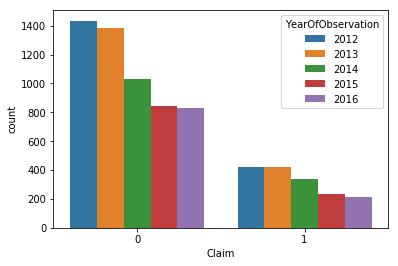

In [134]:
# Can we combine the above metrics in a single plot?
sns.countplot(x='Claim', data=train_data, hue ='YearOfObservation')

In [135]:
pd.pivot_table(train_data,index = ['Residential'], values = 'Customer Id', columns=['Claim'],aggfunc='count')

Claim,0,1
Residential,,
0,3926,1047
1,1600,587


Most buildings are non-residential. Of those that are residential, almost 40% of them claimed for insurance.

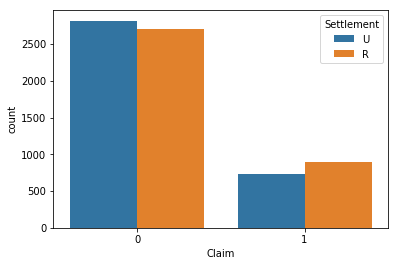

In [136]:
sns.countplot(x='Claim', data=train_data, hue ='Settlement')

There is no big difference between the rural and urban settlement but we can still see that of those who claimed for insurance, the rural were leading.

### Data Pre-processing

In [137]:
#separate the target variable from independent variables
y_train = train_data['Claim']

train_data.drop('Claim',axis=1,inplace=True)

#combine the datasets for preprocessing
combined_data = pd.concat([train_data,test_data],axis=0)
combined_data.shape

(10229, 13)

### Missing values

In [138]:
#check how many missing values are  there in each column
combined_data.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                  11
Settlement               0
Building Dimension     119
Building_Type            0
Date_of_Occupancy     1236
NumberOfWindows          0
Geo_Code               115
dtype: int64

There are 4 variables with missing values. Only one has extremely many missing values.

In [139]:
#fill missing values with mode value
combined_data['Garden'].fillna(combined_data['Garden'].mode()[0],inplace=True)

In [140]:
#fill missing values with None
combined_data['Date_of_Occupancy'].fillna('None',inplace=True)

In [141]:
#fill missing values with mean
combined_data['Building Dimension'].fillna(combined_data['Building Dimension'].mean(),inplace=True)

In [142]:
#fill missing values with mode value
combined_data['Geo_Code'].fillna(combined_data['Geo_Code'].mode()[0],inplace=True)

In [143]:
#replace  . in the NumberOfWindows with None since it means they are missing value
combined_data['NumberOfWindows'].replace(('   .'), 'None', inplace=True)

In [144]:
#confirm there are no missing values 
combined_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64